In [ ]:
print("Input openai api key")
api_key = input()

In [2]:
#@title Prepare

%%capture

!pip install svgwrite
!pip install svgpathtools
!pip install cssutils
!pip install numba
!pip install torch-tools
!pip install visdom
!pip install openai
!pip install fastprogress

# !git clone https://github.com/yael-vinker/CLIPasso.git
!pip install svgwrite svgpathtools cssutils torch-tools visdom imageio-ffmpeg torchfile wandb ftfy mediapipe

# https://stackoverflow.com/questions/55965507
!pip install imageio==2.4.1

!apt-get update && apt-get install -y curl wget git cmake ffmpeg

!git clone https://github.com/tsubasa652/CLISOTS.git --recursive

!git clone https://github.com/tsubasa652/diffvg.git --recursive

%cd /content/diffvg

!python setup.py install

!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git --no-deps

%cd /content/CLISOTS/

!wget https://huggingface.co/akhaliq/CLIPasso/resolve/main/u2net.pth -O ./U2Net_/saved_models/u2net.pth

# import IPython
# from IPython.display import Javascript, display_javascript
from IPython.display import Image, display_png
# from google.colab.output import eval_js
import openai

openai.api_key = api_key

def get_response(model, prompt):
  messages = [
      {
          "role": "user",
          "content": prompt
      }
  ]
  res = openai.ChatCompletion.create(model=model, messages=messages)
  return res.choices[0].message.content

def create_prompt(input_text, model="gpt-4-0613"):

  res = get_response(model, f"「{input_text}」を具体的な顔の特徴に直して")

  print(res)

  res = get_response(model, f"「{res}」を英語にして")

  print(res)

  return res

In [3]:
#@title Prompt
# input_text = input()
input_text = "30代で眉毛が太くて、青髭の短髪で目つきが悪い"

prompt = create_prompt(input_text)
print(prompt)

「30代の特徴を持ちつつ、眉毛は太く立派で、髪は短めに切りそろえられ、その色は青みがかって見える。目つきはきつく、少し不機嫌そうな印象を与える。」
"He seems to be in his 30s, with thick, admirable eyebrows and short, neatly cut hair that looks slightly bluish. His gaze is sharp, giving a somewhat irritable impression."
"He seems to be in his 30s, with thick, admirable eyebrows and short, neatly cut hair that looks slightly bluish. His gaze is sharp, giving a somewhat irritable impression."


/content/CLISOTS
Processing [face.jpg] ...


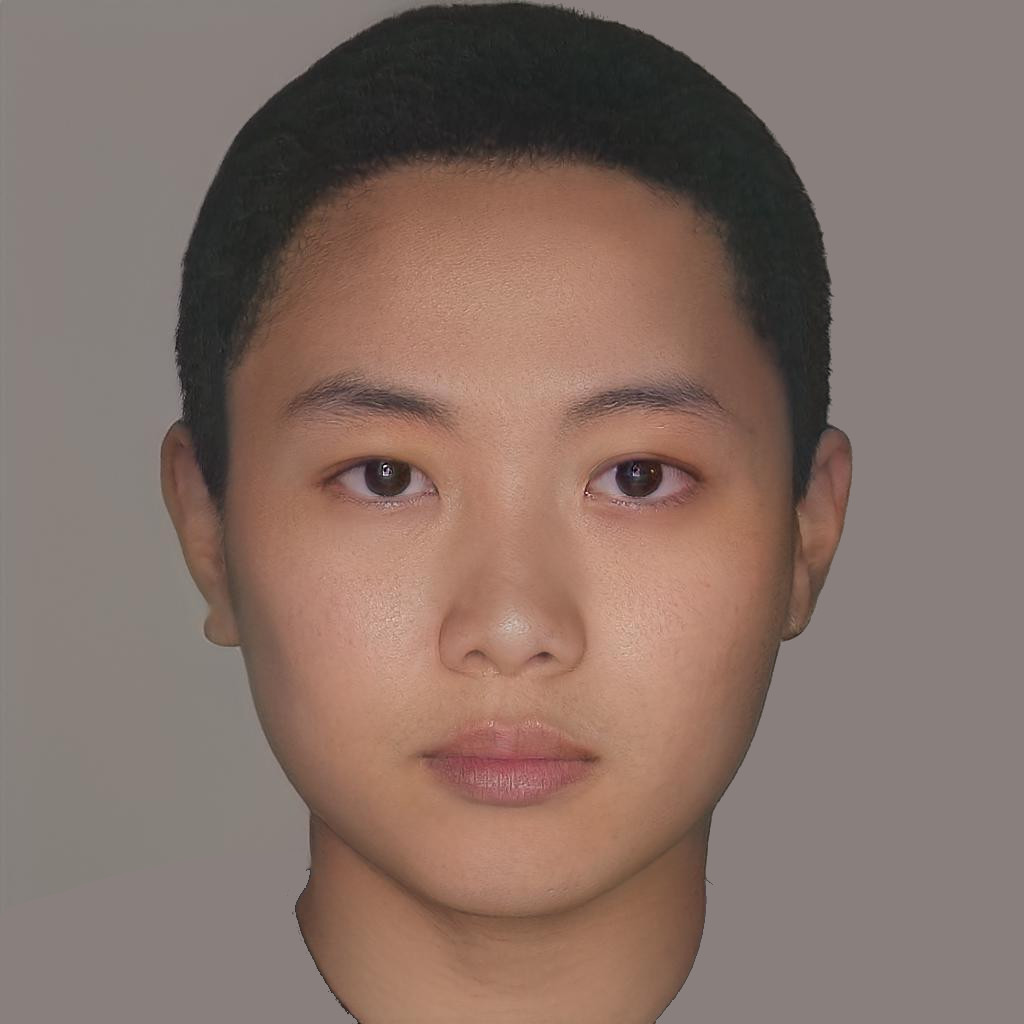

Results will be saved to 
[/content/CLISOTS/output_sketches/face/] ...


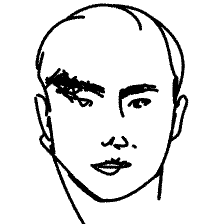

In [4]:
#@title Run

%cd /content/CLISOTS

mask_object = 0 #@param {"type": "integer"}
fix_scale = 0 #@param {"type": "integer"}
num_strokes = 46 #@param {"type": "integer"}
clip_fc_loss_weight = 1.75 # @param {type:"number"}
num_sketches = 1 #@param {"type": "integer"}
num_iter = 2001 #@param {"type": "integer"}
save_interval = 100 #@param {"type": "integer"}


!rm -rf /content/CLIPasso/output_sketches

%run run_object_sketching.py --prompt $prompt --save_interval $save_interval --target_file face.jpg  --clip_fc_loss_weight $clip_fc_loss_weight --num_sketches $num_sketches -colab --mask_object $mask_object --fix_scale $fix_scale --num_strokes $num_strokes --num_iter $num_iter

display_png(Image('target_images/last.png'))

In [ ]:
#@title Prompt
# input_text = input()
input_text = "もう少し顔が縦長"

prompt = create_prompt(input_text)
print(prompt)

「頬骨が高く、あごが細長い」
"High cheekbones and a long, narrow chin."
"High cheekbones and a long, narrow chin."


/content/CLIPasso
Processing [last.png] ...


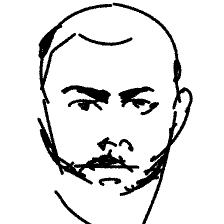

Results will be saved to 
[/content/CLIPasso/output_sketches/last/] ...


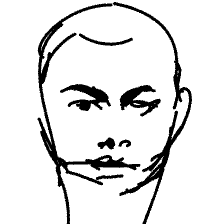

In [ ]:
#@title Run

%cd /content/CLISOTS

mask_object = 0 #@param {"type": "integer"}
fix_scale = 0 #@param {"type": "integer"}
num_strokes = 46 #@param {"type": "integer"}
clip_fc_loss_weight = 0.75 # @param {type:"number"}
num_sketches = 1 #@param {"type": "integer"}
num_iter = 2001 #@param {"type": "integer"}
save_interval = 100 #@param {"type": "integer"}


!rm -rf /content/CLIPasso/output_sketches

%run run_object_sketching.py --prompt $prompt --save_interval $save_interval --target_file last.png  --clip_fc_loss_weight $clip_fc_loss_weight --num_sketches $num_sketches -colab --mask_object $mask_object --fix_scale $fix_scale --num_strokes $num_strokes --num_iter $num_iter

display_png(Image('target_images/last.png'))

In [ ]:
#@title Prompt
# input_text = input()
input_text = "頬がこけている"

prompt = create_prompt(input_text)
print(prompt)

頬が凹んでいて、顔が細長く見える特徴がある。
"They have the characteristic of having sunken cheeks, which makes their face appear long and slender."
"They have the characteristic of having sunken cheeks, which makes their face appear long and slender."


/content/CLIPasso
Processing [last.png] ...


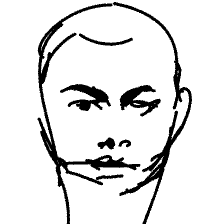

Results will be saved to 
[/content/CLIPasso/output_sketches/last/] ...


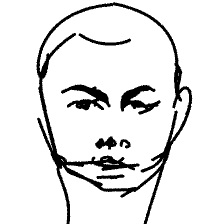

In [ ]:
#@title Run

%cd /content/CLISOTS

mask_object = 0 #@param {"type": "integer"}
fix_scale = 0 #@param {"type": "integer"}
num_strokes = 46 #@param {"type": "integer"}
clip_fc_loss_weight = 0.75 # @param {type:"number"}
num_sketches = 1 #@param {"type": "integer"}
num_iter = 2001 #@param {"type": "integer"}
save_interval = 100 #@param {"type": "integer"}


!rm -rf /content/CLIPasso/output_sketches

%run run_object_sketching.py --prompt $prompt --save_interval $save_interval --target_file last.png  --clip_fc_loss_weight $clip_fc_loss_weight --num_sketches $num_sketches -colab --mask_object $mask_object --fix_scale $fix_scale --num_strokes $num_strokes --num_iter $num_iter

display_png(Image('target_images/last.png'))